<h1 style= "text-align:center ; font-family :Times New Roman; color :#a17b7b ; font-size: 40px">Supply Chain Management</h1>

<html>
    <head>
        <style>
            .img-container{
                display: flex;
            }
        </style>
    </head>
    <body>
        <div class="img-container">
            <center>
                <img src="gif-1.gif" width="300" height="10">
            </center>
        </div>
    </body>
</html>

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Import Libraries</h1>

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
import warnings
warnings.simplefilter(action='ignore')

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Load Datasets</h1>

In [4]:
# train dataset
df = pd.read_excel("Supply_train.xlsx")

# test dataset
df_test = pd.read_excel("Supply_test.xlsx")

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Data Exploration</h1>

In [5]:
# display first 5 rows from train data

df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Ware_house_ID,WH_100000,WH_100001,WH_100002,WH_100003,WH_100004
WH_Manager_ID,EID_50000,EID_50001,EID_50002,EID_50003,EID_50004
Location_type,Urban,Rural,Rural,Rural,Rural
WH_capacity_size,Small,Large,Mid,Mid,Large
zone,West,North,South,North,North
WH_regional_zone,Zone 6,Zone 5,Zone 2,Zone 3,Zone 5
num_refill_req_l3m,3,0,1,7,3
transport_issue_l1y,1,0,0,4,1
Competitor_in_mkt,2,4,4,2,2


In [6]:
# shape and size of train data

print("Shape : ", df.shape)
print("Size : ", df.size)

Shape :  (16620, 25)
Size :  415500


In [7]:
# shape and size of test data

print("Shape : ", df_test.shape)
print("Size : ", df_test.size)

Shape :  (5529, 25)
Size :  138225


In [8]:
#display all columns

print(df.columns)
print(' ')
print("Total columns in train dataset = ", len(df.columns))
print("Total columns in test dataset = ", len(df_test.columns))

Index(['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID', 'Location_type',
       'WH_capacity_size', 'zone', 'WH_regional_zone', 'num_refill_req_l3m',
       'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num',
       'wh_owner_type', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')
 
Total columns in train dataset =  25
Total columns in test dataset =  25


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    5529 non-null   int64  
 1   Ware_house_ID                 5529 non-null   object 
 2   WH_Manager_ID                 5529 non-null   object 
 3   Location_type                 5529 non-null   object 
 4   WH_capacity_size              5529 non-null   object 
 5   zone                          5529 non-null   object 
 6   WH_regional_zone              5529 non-null   object 
 7   num_refill_req_l3m            5529 non-null   int64  
 8   transport_issue_l1y           5529 non-null   int64  
 9   Competitor_in_mkt             5529 non-null   int64  
 10  retail_shop_num               5529 non-null   int64  
 11  wh_owner_type                 5529 non-null   object 
 12  distributor_num               5529 non-null   int64  
 13  flo

In [11]:
df.dtypes.value_counts()

int64      15
object      8
float64     2
Name: count, dtype: int64

In [12]:
# display two sample rows of columns with int dtype

df.select_dtypes(include='int64').sample(2).T

,13608,13159
Unnamed: 0,13608,13159
num_refill_req_l3m,3,1
transport_issue_l1y,0,0
Competitor_in_mkt,4,2
retail_shop_num,4174,4336
distributor_num,51,52
flood_impacted,0,0
flood_proof,0,0
electric_supply,1,1
dist_from_hub,120,158


In [13]:
# display two sample rows of columns with object dtype

df.select_dtypes(include='object').sample(2).T

,5623,11786
Ware_house_ID,WH_105623,WH_111786
WH_Manager_ID,EID_55623,EID_61786
Location_type,Rural,Rural
WH_capacity_size,Mid,Mid
zone,South,North
WH_regional_zone,Zone 4,Zone 4
wh_owner_type,Rented,Rented
approved_wh_govt_certificate,A,A


In [14]:
# display two sample rows of columns with float dtype

df.select_dtypes(include='float64').sample(2).T

,3839,5768
workers_num,NaN,27.0
wh_est_year,2019.0,2023.0


In [15]:
for i in df:
    print(i)
    print(df[i].unique())
    print("Length of unique values in column ", i, ' :', len(df[i].unique()))
    print(' ')

Unnamed: 0
[    0     1     2 ... 16617 16618 16619]
Length of unique values in column  Unnamed: 0  : 16620
 
Ware_house_ID
['WH_100000' 'WH_100001' 'WH_100002' ... 'WH_116617' 'WH_116618'
 'WH_116619']
Length of unique values in column  Ware_house_ID  : 16620
 
WH_Manager_ID
['EID_50000' 'EID_50001' 'EID_50002' ... 'EID_66617' 'EID_66618'
 'EID_66619']
Length of unique values in column  WH_Manager_ID  : 16620
 
Location_type
['Urban' 'Rural']
Length of unique values in column  Location_type  : 2
 
WH_capacity_size
['Small' 'Large' 'Mid']
Length of unique values in column  WH_capacity_size  : 3
 
zone
['West' 'North' 'South' 'East']
Length of unique values in column  zone  : 4
 
WH_regional_zone
['Zone 6' 'Zone 5' 'Zone 2' 'Zone 3' 'Zone 1' 'Zone 4']
Length of unique values in column  WH_regional_zone  : 6
 
num_refill_req_l3m
[3 0 1 7 8 4 6 5 2]
Length of unique values in column  num_refill_req_l3m  : 9
 
transport_issue_l1y
[1 0 4 3 2 5]
Length of unique values in column  transport_i

In [16]:
df.describe().round(2)

,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,16620.00,16620.00,16620.00,16620.00,16620.00,16620.00,16620.0,16620.00,16620.00,16620.00,15953.00,8760.00,16620.00,16620.00,16620.00,16620.00,16620.00
mean,8309.50,4.13,0.78,3.10,4983.90,42.47,0.1,0.06,0.66,163.52,28.91,2009.35,17.13,0.31,3.49,18.73,22098.42
std,4797.93,2.61,1.21,1.15,1051.03,16.09,0.3,0.23,0.48,62.70,7.84,7.54,9.16,0.46,1.69,8.62,11620.34
min,0.00,0.00,0.00,0.00,1821.00,15.00,0.0,0.00,0.00,55.00,10.00,1996.00,0.00,0.00,0.00,1.00,2093.00
25%,4154.75,2.00,0.00,2.00,4309.00,29.00,0.0,0.00,0.00,109.00,24.00,2003.00,10.00,0.00,2.00,11.00,13057.00
50%,8309.50,4.00,0.00,3.00,4856.00,42.00,0.0,0.00,1.00,164.00,28.00,2009.00,18.00,0.00,3.00,19.00,22099.00
75%,12464.25,6.00,1.00,4.00,5500.00,56.00,0.0,0.00,1.00,218.00,33.00,2016.00,24.00,1.00,5.00,26.00,30103.00
max,16619.00,8.00,5.00,12.00,11008.00,70.00,1.0,1.00,1.00,271.00,98.00,2023.00,39.00,1.00,6.00,32.00,55151.00


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Data Cleaning</h1>

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Train Data</h1>

In [17]:
# display number of unique values in each column

df.nunique().sort_values(ascending=False)

Unnamed: 0                      16620
WH_Manager_ID                   16620
Ware_house_ID                   16620
retail_shop_num                  4356
product_wg_ton                   4248
dist_from_hub                     217
workers_num                        60
distributor_num                    56
storage_issue_reported_l3m         37
govt_check_l3m                     32
wh_est_year                        28
Competitor_in_mkt                  12
num_refill_req_l3m                  9
wh_breakdown_l3m                    7
transport_issue_l1y                 6
WH_regional_zone                    6
approved_wh_govt_certificate        5
zone                                4
WH_capacity_size                    3
flood_proof                         2
flood_impacted                      2
temp_reg_mach                       2
Location_type                       2
wh_owner_type                       2
electric_supply                     2
dtype: int64

In [18]:
df.drop(columns=['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID'], inplace = True)

In [19]:
print(len(df[df.duplicated]))

0


In [20]:
# Missing values

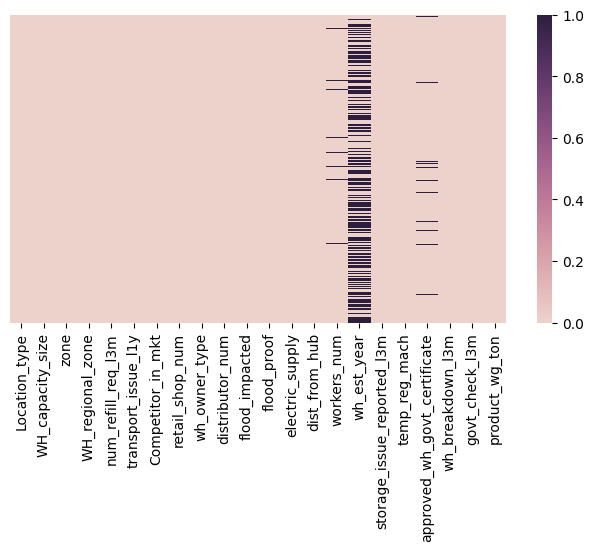

In [21]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), yticklabels=False, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [22]:
# print percentage of null values in each column

null_values_features = [i for i in df.columns if df[i].isnull().sum()>1]
for i in null_values_features:
    print(i, np.round(df[i].isnull().mean()*100, 2), "% missing values")

workers_num 4.01 % missing values
wh_est_year 47.29 % missing values
approved_wh_govt_certificate 3.6 % missing values


In [23]:
df.drop(columns=['wh_est_year'], inplace = True)

In [24]:
df['workers_num'].mean()

28.911490001880523

In [25]:
df['approved_wh_govt_certificate'].mode()

0    C
Name: approved_wh_govt_certificate, dtype: object

In [26]:
df['workers_num'].fillna(int(df['workers_num'].mean()), inplace=True)

In [27]:
df['approved_wh_govt_certificate'].fillna(df['approved_wh_govt_certificate'].mode()[0], inplace=True)

In [28]:
df.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [29]:
# Changing dtype of column 'workers_num' from float to int
#df['workers_num'] = df['workers_num'].astype(int)

In [30]:
# IQR method to find outliers

q1, q2, q3 = df.product_wg_ton.quantile([0.25, 0.50, 0.75])
print("q1 = {}, q2 = {}, q3 = {}".format(q1, q2, q3))
IQR = q3 - q1
print("IQR = ", IQR)
lower = q1 - 1.5*IQR
upper = q3 + 1.5*IQR
print("Lower_Whisker = {} ,Upper_Whisker = {} ". format(lower, upper))
outliers = df[(df.product_wg_ton<lower) | (df.product_wg_ton>upper)].product_wg_ton.count()
print("Total No. outliers in product_wg_ton = ", outliers)

q1 = 13057.0, q2 = 22099.0, q3 = 30103.0
IQR =  17046.0
Lower_Whisker = -12512.0 ,Upper_Whisker = 55672.0 
Total No. outliers in product_wg_ton =  0


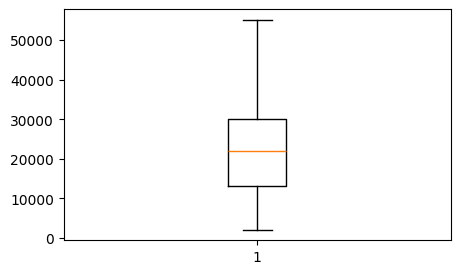

In [31]:
plt.figure(figsize=(5, 3))
plt.boxplot(df.product_wg_ton)
plt.show()

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px">Test Data</h1>

In [32]:
# display number of unique values in each column

df_test.nunique().sort_values(ascending=False)

Unnamed: 0                      5529
Ware_house_ID                   5529
WH_Manager_ID                   5529
product_wg_ton                  2946
retail_shop_num                 2891
dist_from_hub                    217
distributor_num                   56
workers_num                       55
storage_issue_reported_l3m        37
govt_check_l3m                    32
wh_est_year                       28
num_refill_req_l3m                 9
Competitor_in_mkt                  9
wh_breakdown_l3m                   7
WH_regional_zone                   6
transport_issue_l1y                6
approved_wh_govt_certificate       5
zone                               4
WH_capacity_size                   3
electric_supply                    2
temp_reg_mach                      2
flood_impacted                     2
Location_type                      2
wh_owner_type                      2
flood_proof                        2
dtype: int64

In [33]:
df_test.drop(columns=['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID'], inplace = True)

In [34]:
print(len(df_test[df_test.duplicated]))

0


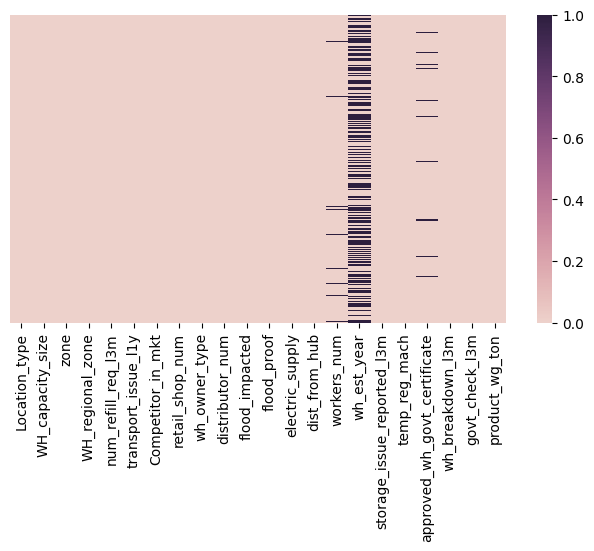

In [35]:
plt.figure(figsize=(8, 4))
sns.heatmap(df_test.isnull(), yticklabels=False, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [36]:
# print percentage of null values in each column

null_values_features = [i for i in df_test.columns if df_test[i].isnull().sum()>1]
for i in null_values_features:
    print(i, np.round(df_test[i].isnull().mean()*100, 2), "% missing values")

workers_num 3.8 % missing values
wh_est_year 48.56 % missing values
approved_wh_govt_certificate 3.73 % missing values


In [37]:
df_test.drop(columns=['wh_est_year'], inplace = True)

In [38]:
df_test['workers_num'].mean()

29.010528294792255

In [39]:
df_test['approved_wh_govt_certificate'].mode()

0    C
Name: approved_wh_govt_certificate, dtype: object

In [40]:
df_test['workers_num'].fillna(int(df_test['workers_num'].mean()), inplace=True)

In [41]:
df_test['approved_wh_govt_certificate'].fillna(df_test['approved_wh_govt_certificate'].mode()[0], inplace=True)

In [42]:
df_test.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [43]:
# Changing dtype of column 'workers_num' from float to int
#df['workers_num'] = df_test['workers_num'].astype(int)

In [44]:
# IQR method to find outliers

q1, q2, q3 = df_test.product_wg_ton.quantile([0.25, 0.50, 0.75])
print("q1 = {}, q2 = {}, q3 = {}".format(q1, q2, q3))
IQR = q3 - q1
print("IQR = ", IQR)
lower = q1 - 1.5*IQR
upper = q3 + 1.5*IQR
print("Lower_Whisker = {} ,Upper_Whisker = {} ". format(lower, upper))
outliers = df_test[(df.product_wg_ton<lower) | (df_test.product_wg_ton>upper)].product_wg_ton.count()
print("Total No. outliers in product_wg_ton = ", outliers)

q1 = 12143.0, q2 = 22099.0, q3 = 30099.0
IQR =  17956.0
Lower_Whisker = -14791.0 ,Upper_Whisker = 57033.0 
Total No. outliers in product_wg_ton =  0


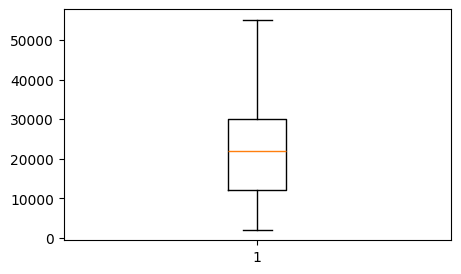

In [45]:
plt.figure(figsize=(5, 3))
plt.boxplot(df_test.product_wg_ton)
plt.show()

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Summary</h1>

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Data Visualization </h1>

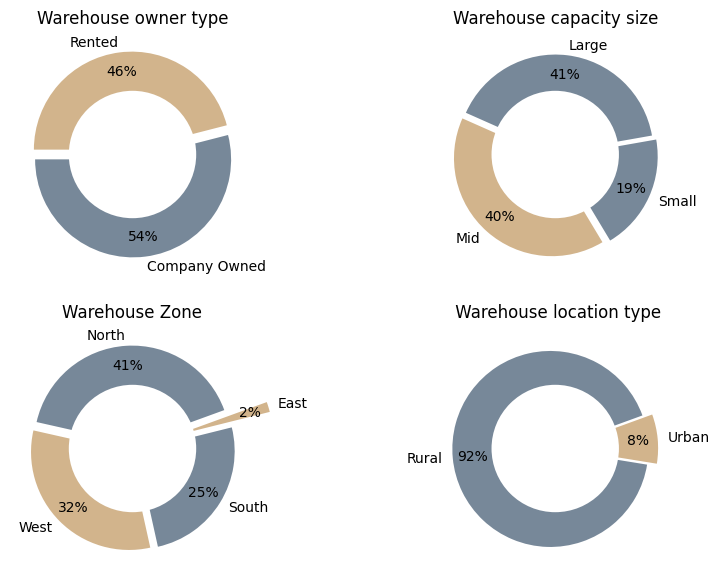

In [46]:
plt.figure(figsize=(10, 7))

ax1 = plt.subplot2grid((2, 2), (0, 0))
df['wh_owner_type'].value_counts().plot(kind = 'pie', colors = ['lightslategrey', 'tan'], autopct='%1.0f%%', explode=(0.05, 0.05),
                                     startangle=180, ylabel='', pctdistance=0.8)
centre_circle = plt.Circle((0, 0), 0.65, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Warehouse owner type')


ax1 = plt.subplot2grid((2, 2), (0, 1))
df['WH_capacity_size'].value_counts().plot(kind = 'pie', colors = ['lightslategrey', 'tan'], autopct='%1.0f%%', explode=(0.02, 0.05, 0.05),
                                     startangle=10, ylabel='', pctdistance=0.8)
centre_circle = plt.Circle((0, 0), 0.65, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Warehouse capacity size')


ax1 = plt.subplot2grid((2, 2), (1, 0))

df['zone'].value_counts().plot(kind = 'pie', colors = ['lightslategrey', 'tan'], autopct='%1.0f%%', explode=(0.05, 0.05, 0.05, 0.45),
                                     startangle=20, ylabel='', pctdistance=0.8)
centre_circle = plt.Circle((0, 0), 0.65, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Warehouse Zone')


ax1 = plt.subplot2grid((2, 2), (1, 1))

df['Location_type'].value_counts().plot(kind = 'pie', colors = ['lightslategrey', 'tan'], autopct='%1.0f%%', explode=(0.05, 0.05),
                                     startangle=20, ylabel='', pctdistance=0.8)
centre_circle = plt.Circle((0, 0), 0.65, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title(' Warehouse location type')


plt.show()

   wh_owner_type  product_wg_ton
0  Company Owned       198120876
1         Rented       169154866
  
  WH_capacity_size  product_wg_ton
0            Large       149361493
1              Mid       148963559
2            Small        68950690
  
    zone  product_wg_ton
1  North       150873479
3   West       117603813
2  South        92550570
0   East         6247880
  
  Location_type  product_wg_ton
0         Rural       333626223
1         Urban        33649519
  


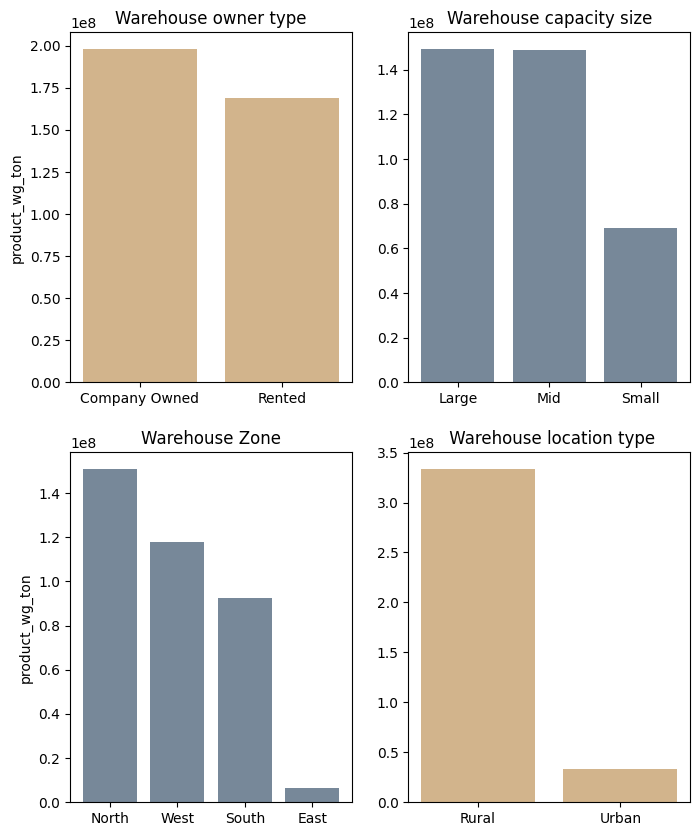

In [47]:
plt.figure(figsize=(8, 10))


# plot 1
ax1 = plt.subplot2grid((2, 2), (0, 0)) 

print(df.groupby('wh_owner_type')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')
x = (df.groupby('wh_owner_type')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))['wh_owner_type']
y = (df.groupby('wh_owner_type')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))['product_wg_ton']

plt.bar(x, y, color='tan')
plt.title('Warehouse owner type')
plt.ylabel('product_wg_ton')

# plot 2
ax1 = plt.subplot2grid((2, 2), (0, 1))

print(df.groupby('WH_capacity_size')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')
x = (df.groupby('WH_capacity_size')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))['WH_capacity_size']
y = (df.groupby('WH_capacity_size')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))['product_wg_ton']

plt.bar(x, y, color='lightslategrey')
plt.title('Warehouse capacity size')

# plot 3
ax1 = plt.subplot2grid((2, 2), (1, 0))

print(df.groupby('zone')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')
x = (df.groupby('zone')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))['zone']
y = (df.groupby('zone')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))['product_wg_ton']

plt.bar(x, y, color='lightslategrey')
plt.title('Warehouse Zone')
plt.ylabel('product_wg_ton')

# plot 4
ax1 = plt.subplot2grid((2, 2), (1, 1))

print(df.groupby('Location_type')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')
x = (df.groupby('Location_type')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))['Location_type']
y = (df.groupby('Location_type')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))['product_wg_ton']

plt.bar(x, y, color='tan')
plt.title(' Warehouse location type')

plt.show()

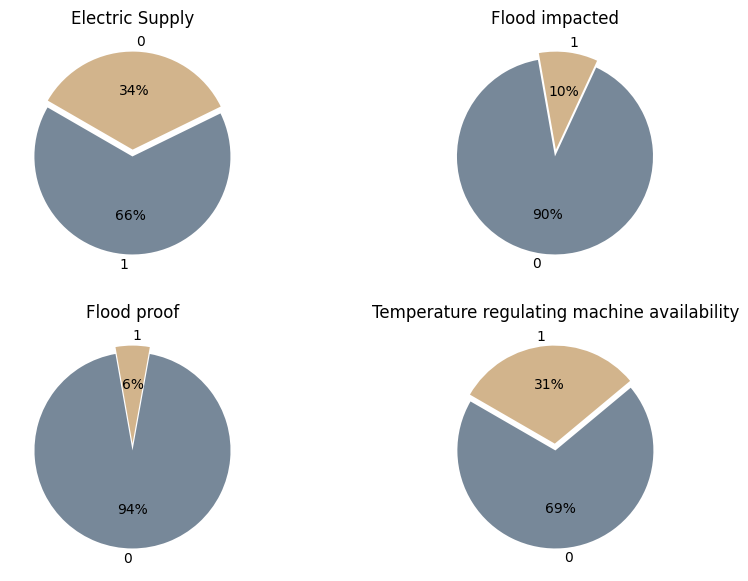

In [48]:
plt.figure(figsize=(10, 7))

ax1 = plt.subplot2grid((2, 2), (0, 0)) 
df['electric_supply'].value_counts().plot(kind = 'pie', colors = ['lightslategrey', 'tan'], autopct='%1.0f%%', explode=(0.02, 0.05),
                                         startangle=150, ylabel='')
plt.title('Electric Supply')


ax1 = plt.subplot2grid((2, 2), (0, 1))
df['flood_impacted'].value_counts().plot(kind = 'pie', colors = ['lightslategrey', 'tan'], autopct='%1.0f%%', explode=(0.02, 0.05),
                                         startangle=100, ylabel='')
plt.title('Flood impacted')


ax1 = plt.subplot2grid((2, 2), (1, 0))
df['flood_proof'].value_counts().plot(kind = 'pie', colors = ['lightslategrey', 'tan'], autopct='%1.0f%%', explode=(0.02, 0.05),
                                         startangle=100, ylabel='')
plt.title('Flood proof')


ax1 = plt.subplot2grid((2, 2), (1, 1))
df['temp_reg_mach'].value_counts().plot(kind = 'pie', colors = ['lightslategrey', 'tan'], autopct='%1.0f%%', explode=(0.02, 0.05),
                                         startangle=150, ylabel='')
plt.title('Temperature regulating machine availability')



plt.show()

   electric_supply  product_wg_ton
1                1       240687922
0                0       126587820
  
   flood_impacted  product_wg_ton
0               0       331726256
1               1        35549486
  
   flood_proof  product_wg_ton
0            0       346873619
1            1        20402123
  
   temp_reg_mach  product_wg_ton
0              0       245767917
1              1       121507825
  


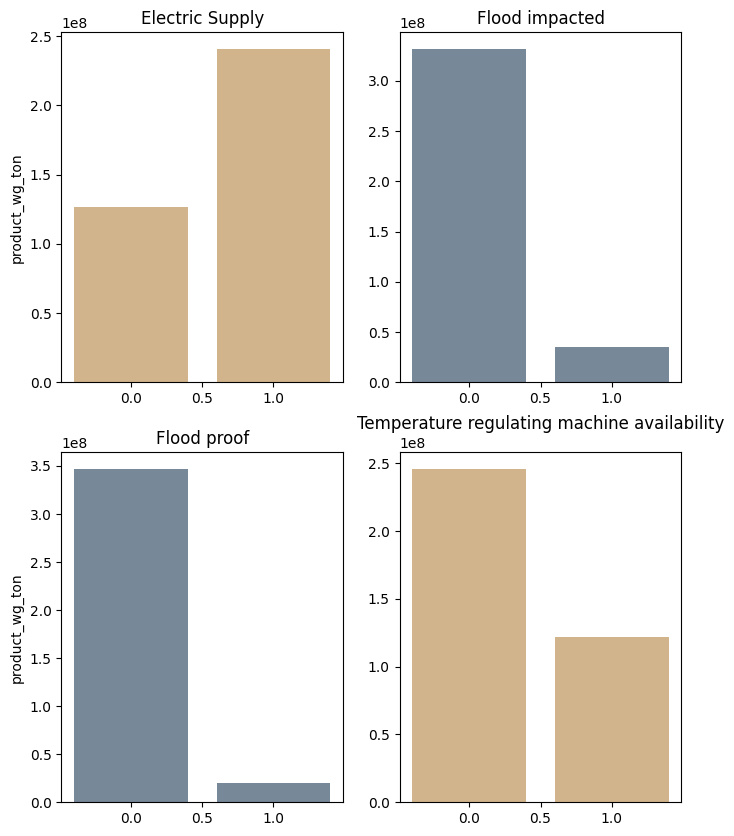

In [49]:
plt.figure(figsize=(8, 10))


# plot 1
ax1 = plt.subplot2grid((2, 2), (0, 0)) 

print(df.groupby('electric_supply')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')
x = (df.groupby('electric_supply')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))['electric_supply']
y = (df.groupby('electric_supply')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))['product_wg_ton']

plt.bar(x, y, color='tan')
plt.title('Electric Supply')
plt.ylabel('product_wg_ton')

# plot 2
ax1 = plt.subplot2grid((2, 2), (0, 1))

print(df.groupby('flood_impacted')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')
x = (df.groupby('flood_impacted')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))['flood_impacted']
y = (df.groupby('flood_impacted')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))['product_wg_ton']

plt.bar(x, y, color='lightslategrey')
plt.title('Flood impacted')

# plot 3
ax1 = plt.subplot2grid((2, 2), (1, 0))

print(df.groupby('flood_proof')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')
x = (df.groupby('flood_proof')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))['flood_proof']
y = (df.groupby('flood_proof')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))['product_wg_ton']

plt.bar(x, y, color='lightslategrey')
plt.title('Flood proof')
plt.ylabel('product_wg_ton')

# plot 4
ax1 = plt.subplot2grid((2, 2), (1, 1))

print(df.groupby('temp_reg_mach')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')
x = (df.groupby('temp_reg_mach')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))['temp_reg_mach']
y = (df.groupby('temp_reg_mach')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))['product_wg_ton']

plt.bar(x, y, color='tan')
plt.title('Temperature regulating machine availability')

plt.show()

      retail_shop_num  product_wg_ton
1806             4808          395952
1814             4816          388488


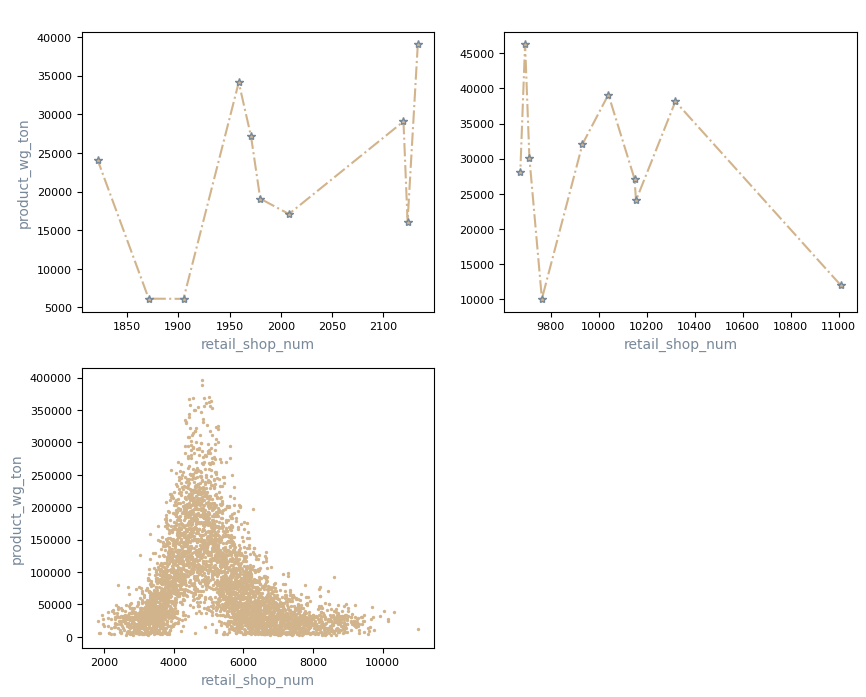

In [50]:
print(df.groupby('retail_shop_num')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).head(2))

plt.figure(figsize=(10, 8))

# plot 1
ax1 = plt.subplot2grid((2, 2), (0, 0)) 

x = (df.groupby('retail_shop_num')['product_wg_ton'].sum().reset_index().sort_values(by='retail_shop_num', ascending=False).tail(10))['retail_shop_num']
y = (df.groupby('retail_shop_num')['product_wg_ton'].sum().reset_index().sort_values(by='retail_shop_num', ascending=False).tail(10))['product_wg_ton']

plt.plot(x, y, color='tan', marker='*', markeredgecolor='lightslategrey', linestyle='-.')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('retail_shop_num', color='lightslategrey')
plt.ylabel('product_wg_ton', color='lightslategrey')
plt.title(' ')


#plot 2
ax1 = plt.subplot2grid((2, 2), (0, 1)) 


x = (df.groupby('retail_shop_num')['product_wg_ton'].sum().reset_index().sort_values(by='retail_shop_num', ascending=False).head(10))['retail_shop_num']
y = (df.groupby('retail_shop_num')['product_wg_ton'].sum().reset_index().sort_values(by='retail_shop_num', ascending=False).head(10))['product_wg_ton']

plt.plot(x, y, color='tan', marker='*', markeredgecolor='lightslategrey', linestyle='-.')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('retail_shop_num', color='lightslategrey')
plt.title(' ')

# plot 3
ax1 = plt.subplot2grid((2, 2), (1, 0)) 

x = (df.groupby('retail_shop_num')['product_wg_ton'].sum().reset_index().sort_values(by='retail_shop_num', ascending=False))['retail_shop_num']
y = (df.groupby('retail_shop_num')['product_wg_ton'].sum().reset_index().sort_values(by='retail_shop_num', ascending=False))['product_wg_ton']

plt.scatter(x, y, color='tan',  marker='o', s=2)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('retail_shop_num', color='lightslategrey')
plt.ylabel('product_wg_ton', color='lightslategrey')
plt.title(' ')



plt.show()

    workers_num  product_wg_ton
18         28.0        35533395
17         27.0        20787445


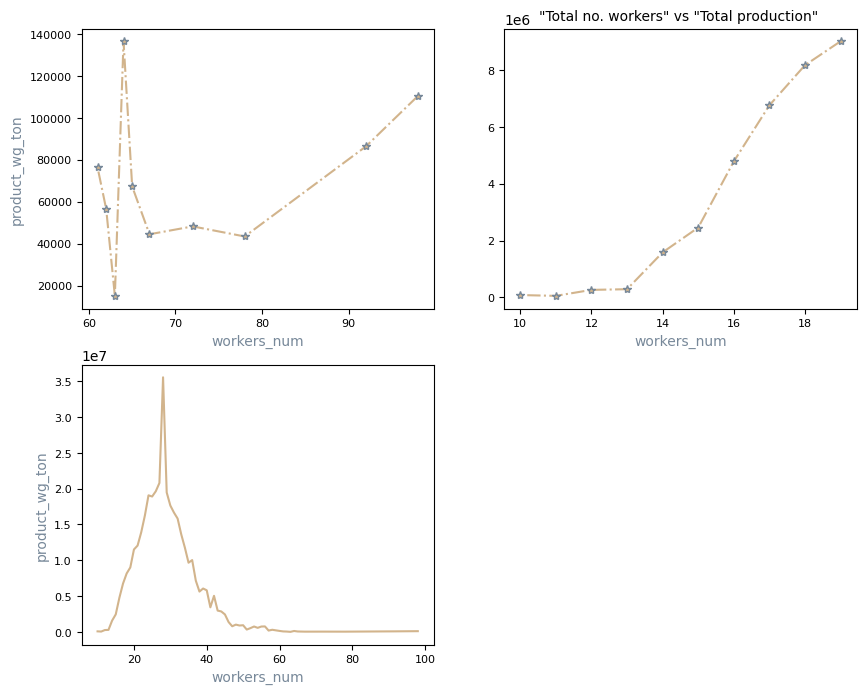

In [51]:
print(df.groupby('workers_num')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).head(2))


plt.figure(figsize=(10, 8))

# plot 1
ax1 = plt.subplot2grid((2, 2), (0, 0)) 

x = (df.groupby('workers_num')['product_wg_ton'].sum().reset_index().sort_values(by='workers_num', ascending=False).head(10))['workers_num']
y = (df.groupby('workers_num')['product_wg_ton'].sum().reset_index().sort_values(by='workers_num', ascending=False).head(10))['product_wg_ton']

plt.plot(x, y, color='tan', marker='*', markeredgecolor='lightslategrey', linestyle='-.')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('workers_num', color='lightslategrey')
plt.ylabel('product_wg_ton', color='lightslategrey')


# plot 2
ax2 = plt.subplot2grid((2, 2), (0, 1)) 

x = (df.groupby('workers_num')['product_wg_ton'].sum().reset_index().sort_values(by='workers_num', ascending=False).tail(10))['workers_num']
y = (df.groupby('workers_num')['product_wg_ton'].sum().reset_index().sort_values(by='workers_num', ascending=False).tail(10))['product_wg_ton']

plt.plot(x, y, color='tan', marker='*', markeredgecolor='lightslategrey', linestyle='-.')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('workers_num', color='lightslategrey')
plt.title('"Total no. workers" vs "Total production" ', fontsize=10)

# plot 3
ax3 = plt.subplot2grid((2, 2), (1, 0)) 

x = (df.groupby('workers_num')['product_wg_ton'].sum().reset_index().sort_values(by='workers_num', ascending=False))['workers_num']
y = (df.groupby('workers_num')['product_wg_ton'].sum().reset_index().sort_values(by='workers_num', ascending=False))['product_wg_ton']

plt.plot(x, y, color='tan', linestyle='-')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('workers_num', color='lightslategrey')
plt.ylabel('product_wg_ton', color='lightslategrey')

plt.show()

     dist_from_hub  product_wg_ton
154            209         2388377
131            186         2349026
90             145         2202300
149            204         2200828
46             101         2199027
 


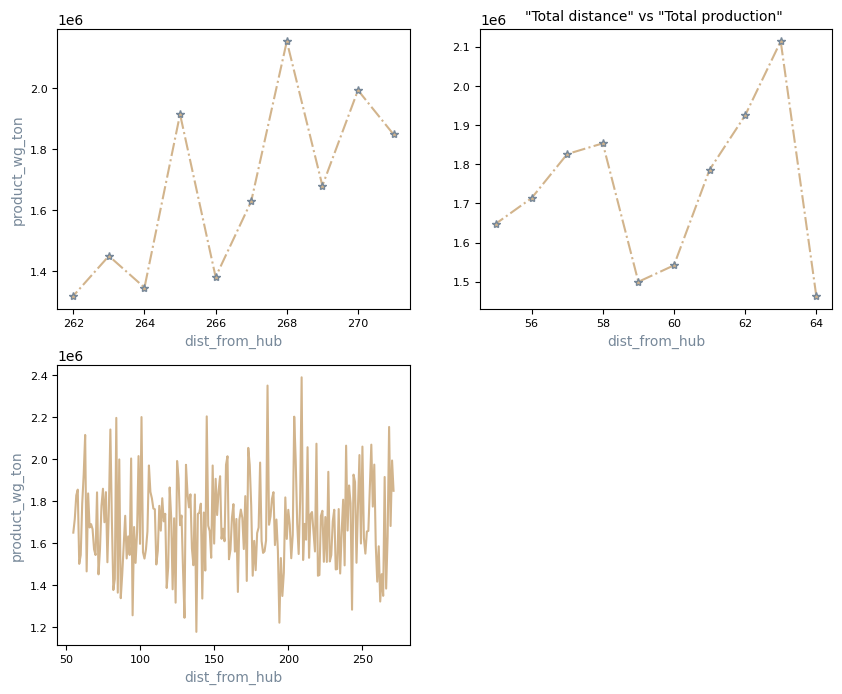

In [52]:
print(df.groupby('dist_from_hub')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).head())
print(' ')

plt.figure(figsize=(10, 8))

# plot 1
ax1 = plt.subplot2grid((2, 2), (0, 0)) 

x = (df.groupby('dist_from_hub')['product_wg_ton'].sum().reset_index().sort_values(by='dist_from_hub', ascending=False).head(10))['dist_from_hub']
y = (df.groupby('dist_from_hub')['product_wg_ton'].sum().reset_index().sort_values(by='dist_from_hub', ascending=False).head(10))['product_wg_ton']

plt.plot(x, y, color='tan', marker='*', markeredgecolor='lightslategrey', linestyle='-.')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('dist_from_hub', color='lightslategrey')
plt.ylabel('product_wg_ton', color='lightslategrey')


# plot 2
ax2 = plt.subplot2grid((2, 2), (0, 1)) 

x = (df.groupby('dist_from_hub')['product_wg_ton'].sum().reset_index().sort_values(by='dist_from_hub', ascending=False).tail(10))['dist_from_hub']
y = (df.groupby('dist_from_hub')['product_wg_ton'].sum().reset_index().sort_values(by='dist_from_hub', ascending=False).tail(10))['product_wg_ton']

plt.plot(x, y, color='tan', marker='*', markeredgecolor='lightslategrey', linestyle='-.')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('dist_from_hub', color='lightslategrey')
plt.title('"Total distance" vs "Total production" ', fontsize=10)

# plot 3
ax3 = plt.subplot2grid((2, 2), (1, 0)) 

x = (df.groupby('dist_from_hub')['product_wg_ton'].sum().reset_index().sort_values(by='dist_from_hub', ascending=False))['dist_from_hub']
y = (df.groupby('dist_from_hub')['product_wg_ton'].sum().reset_index().sort_values(by='dist_from_hub', ascending=False))['product_wg_ton']

plt.plot(x, y, color='tan', linestyle='-')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('dist_from_hub', color='lightslategrey')
plt.ylabel('product_wg_ton', color='lightslategrey')

plt.show()

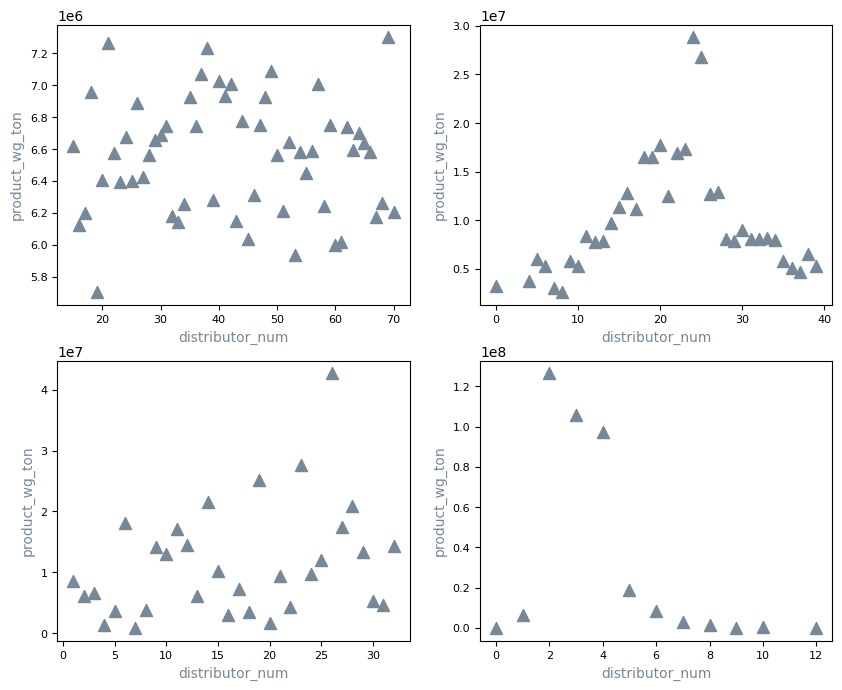

In [53]:
plt.figure(figsize=(10, 8))

# plot 1
ax1 = plt.subplot2grid((2, 2), (0, 0)) 

x = (df.groupby('distributor_num')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False))['distributor_num']
y = (df.groupby('distributor_num')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False))['product_wg_ton']

plt.scatter(x, y, color ='lightslategrey',  marker='^', s=75)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('distributor_num', color='lightslategrey')
plt.ylabel('product_wg_ton', color='lightslategrey')


# plot 2
ax1 = plt.subplot2grid((2, 2), (0, 1)) 

x = (df.groupby('storage_issue_reported_l3m')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False))['storage_issue_reported_l3m']
y = (df.groupby('storage_issue_reported_l3m')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False))['product_wg_ton']

plt.scatter(x, y, color ='lightslategrey',  marker='^', s=75)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('distributor_num', color='lightslategrey')
plt.ylabel('product_wg_ton', color='lightslategrey')




# plot 3
ax1 = plt.subplot2grid((2, 2), (1, 0)) 

x = (df.groupby('govt_check_l3m')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False))['govt_check_l3m']
y = (df.groupby('govt_check_l3m')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False))['product_wg_ton']

plt.scatter(x, y, color ='lightslategrey',  marker='^', s=75)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('distributor_num', color='lightslategrey')
plt.ylabel('product_wg_ton', color='lightslategrey')



# plot 4
ax1 = plt.subplot2grid((2, 2), (1, 1)) 

x = (df.groupby('Competitor_in_mkt')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False))['Competitor_in_mkt']
y = (df.groupby('Competitor_in_mkt')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False))['product_wg_ton']

plt.scatter(x, y, color ='lightslategrey',  marker='^', s=75)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('distributor_num', color='lightslategrey')
plt.ylabel('product_wg_ton', color='lightslategrey')

plt.show()

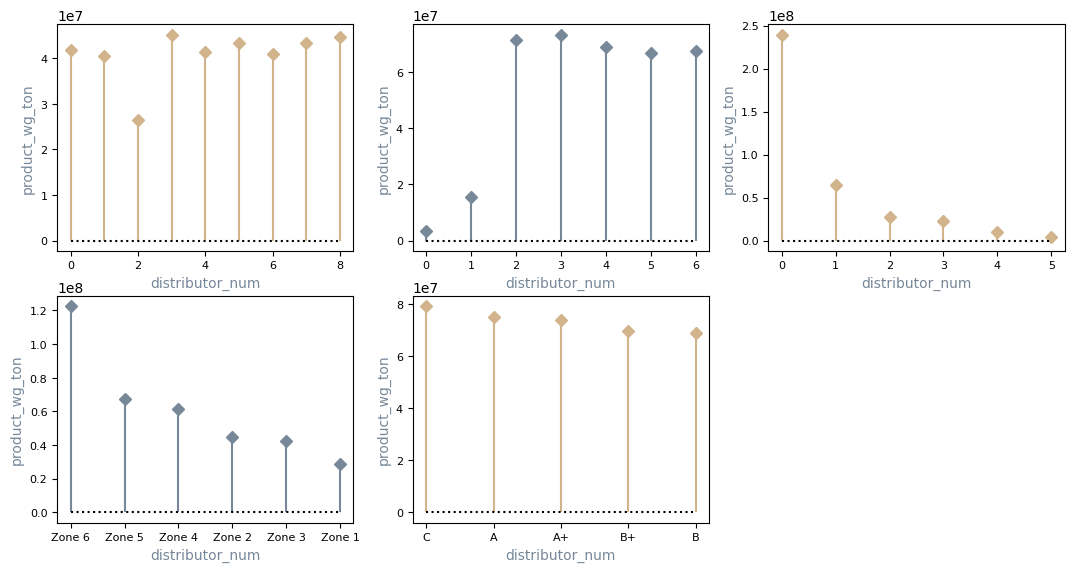

In [54]:
plt.figure(figsize=(13, 10))

# plot 1
ax1 = plt.subplot2grid((3, 3), (0, 0)) 

x = (df.groupby('num_refill_req_l3m')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False))['num_refill_req_l3m']
y = (df.groupby('num_refill_req_l3m')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False))['product_wg_ton']

plt.stem(x, y, linefmt='tan', basefmt='k:', markerfmt='D')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('distributor_num', color='lightslategrey')
plt.ylabel('product_wg_ton', color='lightslategrey')

# plot 2
ax2 = plt.subplot2grid((3, 3), (0, 1)) 

x = (df.groupby('wh_breakdown_l3m')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False))['wh_breakdown_l3m']
y = (df.groupby('wh_breakdown_l3m')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False))['product_wg_ton']

plt.stem(x, y, linefmt='lightslategrey', basefmt='k:', markerfmt='D')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('distributor_num', color='lightslategrey')
plt.ylabel('product_wg_ton', color='lightslategrey')

# plot 3
ax3 = plt.subplot2grid((3, 3), (0, 2)) 

x = (df.groupby('transport_issue_l1y')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False))['transport_issue_l1y']
y = (df.groupby('transport_issue_l1y')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False))['product_wg_ton']

plt.stem(x, y, linefmt='tan', basefmt='k:', markerfmt='D')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('distributor_num', color='lightslategrey')
plt.ylabel('product_wg_ton', color='lightslategrey')


# plot 4
ax1 = plt.subplot2grid((3, 3), (1, 0)) 

x = (df.groupby('WH_regional_zone')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False))['WH_regional_zone']
y = (df.groupby('WH_regional_zone')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False))['product_wg_ton']

plt.stem(x, y, linefmt='lightslategrey', basefmt='k:', markerfmt='D')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('distributor_num', color='lightslategrey')
plt.ylabel('product_wg_ton', color='lightslategrey')


# plot 5
ax1 = plt.subplot2grid((3, 3), (1, 1)) 

x = (df.groupby('approved_wh_govt_certificate')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False))['approved_wh_govt_certificate']
y = (df.groupby('approved_wh_govt_certificate')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False))['product_wg_ton']

plt.stem(x, y, linefmt='tan', basefmt='k:', markerfmt='D')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('distributor_num', color='lightslategrey')
plt.ylabel('product_wg_ton', color='lightslategrey')


plt.show()

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Summary</h1>

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Data Encoding</h1>

In [55]:
# Numerical columns & categorical columns in train dataset

num_columns_train=[i for i in df.columns if df[i].dtypes != 'O']
cat_columns_train=[i for i in df.columns if df[i].dtypes == 'O']

# Numerical columns & categorical columns in test dataset

num_columns_test=[i for i in df_test.columns if df_test[i].dtypes != 'O']
cat_columns_test=[i for i in df_test.columns if df_test[i].dtypes == 'O']


In [56]:
# Label Encoding for categorical variables
 
for i in cat_columns_train:
    df[i] = LabelEncoder().fit_transform(df[i])

for i in cat_columns_test:
    df_test[i] = LabelEncoder().fit_transform(df_test[i])

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Data Scaling</h1>

In [57]:
# display number of unique values in each column
df.nunique().sort_values(ascending=False)

retail_shop_num                 4356
product_wg_ton                  4248
dist_from_hub                    217
workers_num                       60
distributor_num                   56
storage_issue_reported_l3m        37
govt_check_l3m                    32
Competitor_in_mkt                 12
num_refill_req_l3m                 9
wh_breakdown_l3m                   7
WH_regional_zone                   6
transport_issue_l1y                6
approved_wh_govt_certificate       5
zone                               4
WH_capacity_size                   3
temp_reg_mach                      2
Location_type                      2
electric_supply                    2
flood_proof                        2
wh_owner_type                      2
flood_impacted                     2
dtype: int64

In [58]:
columns_with_more_than_two_unique_values_train = df.columns[df.nunique()>2]

In [59]:
columns_with_more_than_two_unique_values_test = df_test.columns[df_test.nunique()>2]

In [60]:
# Standard Scaling for numerical variables

for i in columns_with_more_than_two_unique_values_train:
  df[i] = StandardScaler().fit_transform(df[[i]])

for i in columns_with_more_than_two_unique_values_test:
  df_test[i] = StandardScaler().fit_transform(df_test[[i]])

In [61]:
df.sample(5).T

,9484,12299,13614,14970,11593
Location_type,1.000000,0.000000,0.000000,0.000000,0.000000
WH_capacity_size,-1.058270,0.288162,-1.058270,1.634595,0.288162
zone,-0.993113,1.270090,-0.993113,1.270090,1.270090
WH_regional_zone,0.447405,-0.152649,1.047458,1.047458,-0.152649
num_refill_req_l3m,-1.199716,1.486226,1.102520,-0.048598,1.486226
transport_issue_l1y,0.181605,1.010576,-0.647365,-0.647365,-0.647365
Competitor_in_mkt,0.781467,-0.089859,-0.961184,0.781467,-0.961184
retail_shop_num,-0.372888,-0.101717,0.080014,0.516741,0.474876
wh_owner_type,0.000000,1.000000,0.000000,1.000000,1.000000
distributor_num,0.902842,0.778538,0.281319,0.592081,1.213604


In [62]:
df_test.sample(5).T

,4872,1168,1317,3769,5256
Location_type,0.000000,0.000000,0.000000,0.000000,1.000000
WH_capacity_size,-1.064434,-1.064434,-1.064434,-1.064434,-1.064434
zone,0.152391,1.283358,0.152391,-0.978576,-0.978576
WH_regional_zone,0.460868,0.460868,0.460868,1.056366,0.460868
num_refill_req_l3m,-0.770801,0.381233,-0.386790,-0.770801,0.381233
transport_issue_l1y,1.881665,1.881665,0.197397,-0.644738,-0.644738
Competitor_in_mkt,-0.094096,-0.980389,-0.980389,-0.980389,-0.980389
retail_shop_num,-0.723849,0.600563,-0.784829,-2.006337,-1.322216
wh_owner_type,1.000000,1.000000,1.000000,0.000000,0.000000
distributor_num,-1.574588,-1.073288,0.054638,0.493276,-1.010625


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Feature Selection</h1>

In [63]:
# correlation heatmap

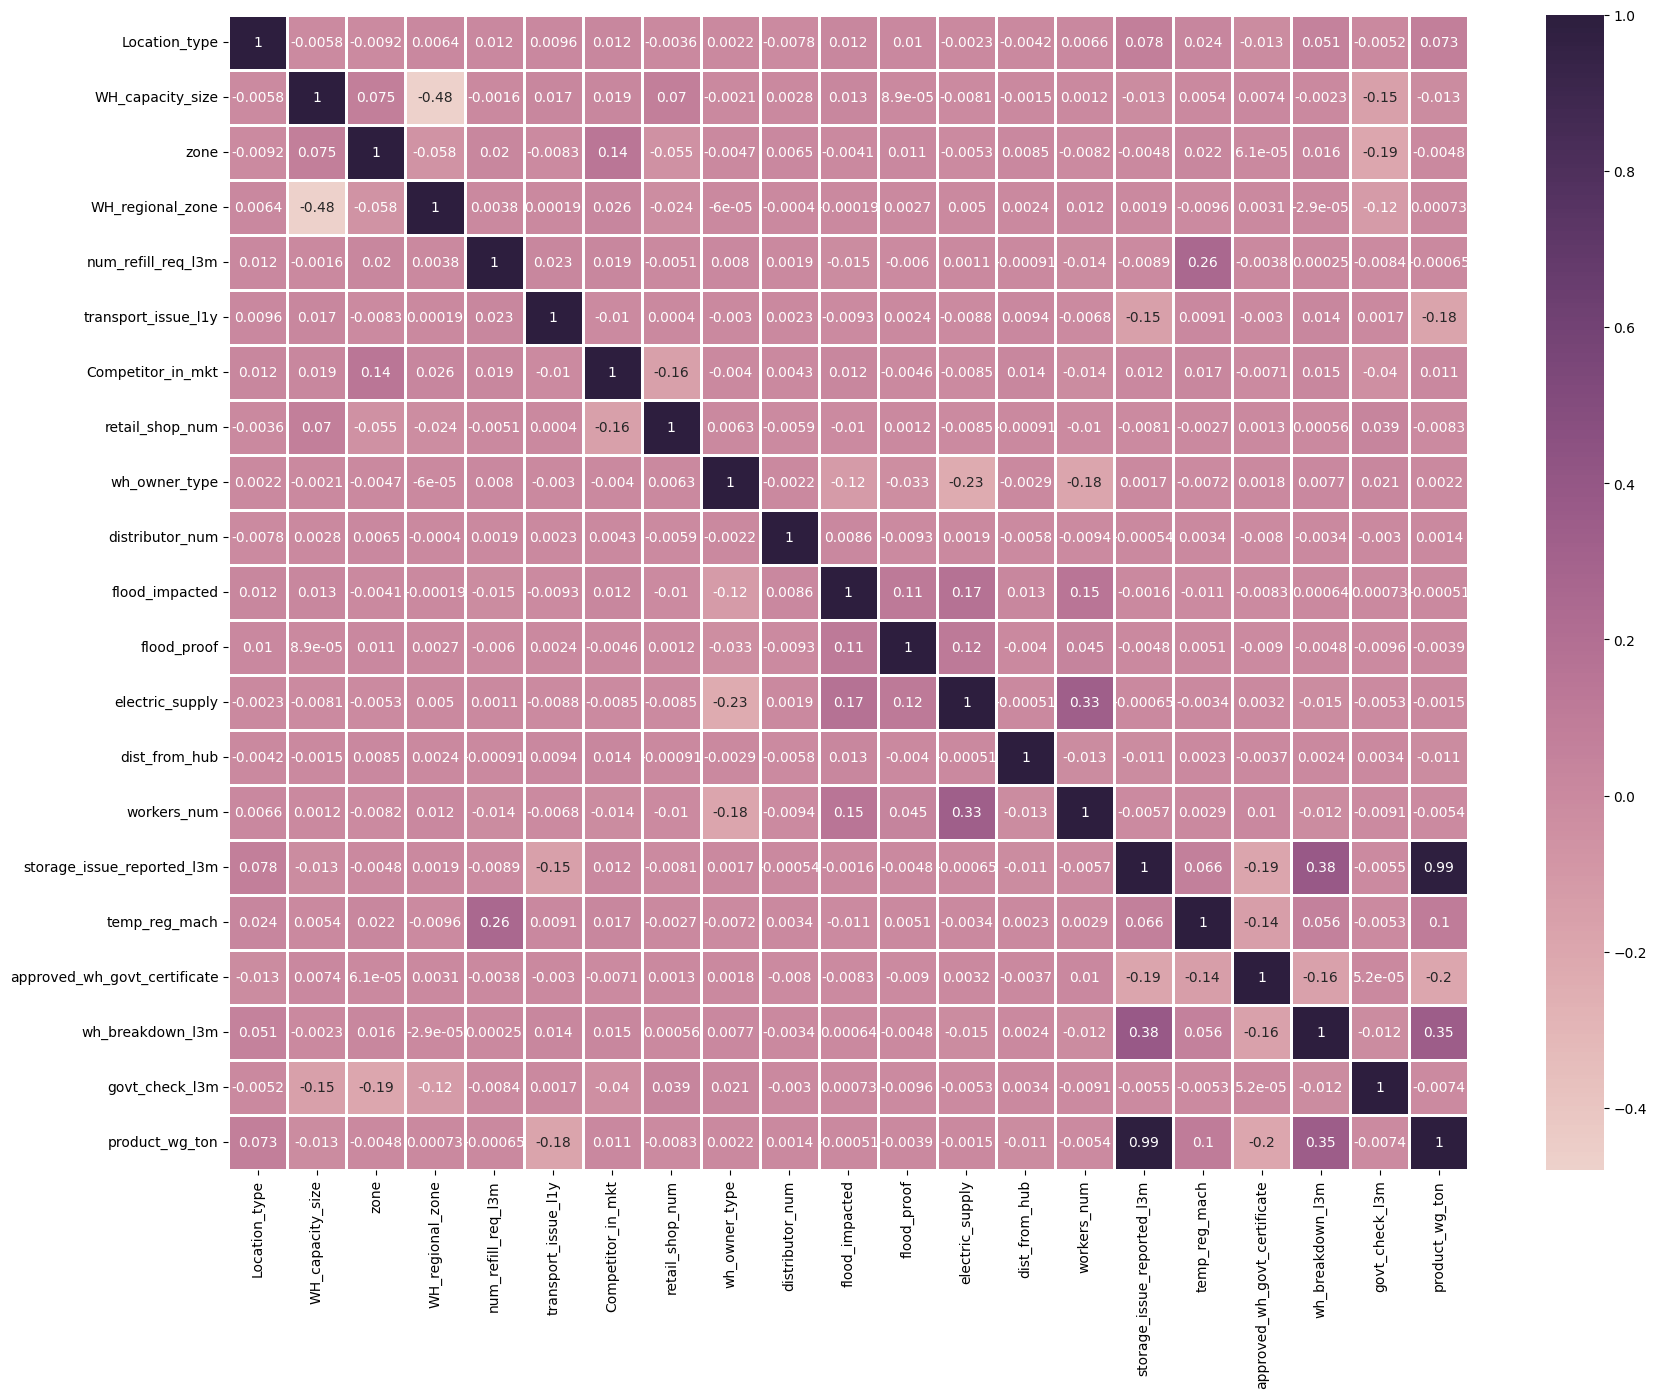

In [64]:
plt.figure(figsize=(20, 15))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), linewidths=1)
plt.show()

In [65]:
data = df.loc[:, df.columns !='product_wg_ton']
correlations = data.corrwith(df['product_wg_ton']).round(3).sort_values(ascending=True)
correlations

approved_wh_govt_certificate   -0.199
transport_issue_l1y            -0.183
WH_capacity_size               -0.013
dist_from_hub                  -0.011
retail_shop_num                -0.008
govt_check_l3m                 -0.007
zone                           -0.005
workers_num                    -0.005
flood_proof                    -0.004
electric_supply                -0.002
num_refill_req_l3m             -0.001
flood_impacted                 -0.001
distributor_num                 0.001
WH_regional_zone                0.001
wh_owner_type                   0.002
Competitor_in_mkt               0.011
Location_type                   0.073
temp_reg_mach                   0.102
wh_breakdown_l3m                0.345
storage_issue_reported_l3m      0.987
dtype: float64

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Splitting Dataset</h1>

In [66]:
#Selecting Independent (Features) & Dependent(Target) variables

X_train = df.drop(['product_wg_ton'], axis=1)
Y_train = df['product_wg_ton']

X_test = df_test.drop(['product_wg_ton'], axis=1)
Y_test = df_test['product_wg_ton']

In [67]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (16620, 20)
Shape of X_test: (5529, 20)


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 20px">Machine Learning Regression Algorithms</h1>

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 18px">Linear Regression</h1>

In [68]:
# Initialize the model

LRmodel = LinearRegression()

In [69]:
# Fit model to the training data

LRmodel.fit(X_train, Y_train)

LinearRegression()

In [70]:
# Make predictions on the test data

LR_predicted = LRmodel.predict(X_test)

In [147]:
# Evaluate  the model

# r2 score
lr_r2 = r2_score(Y_test, LR_predicted).round(3)
print('R2 score:  ', lr_r2)

# mean squared error (MSE)
lr_mse = mean_squared_error(Y_test, LR_predicted).round(3)
print('Mean Squared Error:  ', lr_mse)

# root mean squared error (RMSE)
lr_rmse = np.sqrt(mean_squared_error(Y_test, LR_predicted)).round(3)
print('Root Mean Squared Error:  ', lr_rmse) 

# mean absolute error (MAE)
lr_mae = mean_absolute_error(Y_test, LR_predicted).round(3)
print('Mean Absolute Error:  ', lr_mae)


Test score :   0.977
R2 score:   0.977
Mean Squared Error:   0.023
Root Mean Squared Error:   0.151
Mean Absolute Error:   0.111


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 18px">Decision Tree</h1>

In [72]:
# Initialize the model

DTmodel = DecisionTreeRegressor(random_state = 0) 

In [73]:
# Fit model to the training data

DTmodel.fit(X_train, Y_train) 

DecisionTreeRegressor(random_state=0)

In [74]:
# Make predictions on the test data

DT_predicted = DTmodel.predict(X_test)

In [149]:
# Evaluate  the model

# r2 score
dt_r2 = r2_score(Y_test, DT_predicted).round(3)
print('R2 score:  ', dt_r2)

# mean squared error (MSE)
dt_mse = mean_squared_error(Y_test, DT_predicted).round(3)
print('Mean Squared Error:  ', dt_mse)

# root mean squared error (RMSE)
dt_rmse = np.sqrt(mean_squared_error(Y_test, DT_predicted)).round(3)
print('Root Mean Squared Error:  ', dt_rmse) 

# mean absolute error (MAE)
dt_mae = mean_absolute_error(Y_test, DT_predicted).round(3)
print('Mean Absolute Error:  ', dt_mae)


Test score :   0.987
R2 score:   0.987
Mean Squared Error:   0.013
Root Mean Squared Error:   0.114
Mean Absolute Error:   0.076


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 18px">Random Forest</h1>

In [76]:
# Initialize the model

RFmodel = RandomForestRegressor(n_estimators = 100, max_depth = 4, random_state = 0) 

In [77]:
# Fit model to the training data

RFmodel.fit(X_train, Y_train)

RandomForestRegressor(max_depth=4, random_state=0)

In [78]:
# Make predictions on the test data

RF_predicted = RFmodel.predict(X_test)

In [150]:
# Evaluate  the model

# r2 score
rf_r2 = r2_score(Y_test, RF_predicted).round(3)
print('R2 score:  ', rf_r2)

# mean squared error (MSE)
rf_mse = mean_squared_error(Y_test, RF_predicted).round(3)
print('Mean Squared Error:  ', rf_mse)

# root mean squared error (RMSE)
rf_rmse = np.sqrt(mean_squared_error(Y_test, RF_predicted)).round(3)
print('Root Mean Squared Error:  ', rf_rmse) 

# mean absolute error (MAE)
rf_mae = mean_absolute_error(Y_test, RF_predicted).round(3)
print('Mean Absolute Error:  ', rf_mae)


Test score :   0.98
R2 score:   0.98
Mean Squared Error:   0.02
Root Mean Squared Error:   0.141
Mean Absolute Error:   0.108


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 18px">Support Vector Machine</h1>

In [80]:
# Initialize the model

SVmodel = SVR() 

In [81]:
# Fit model to the training data

SVmodel.fit(X_train, Y_train) 

SVR()

In [82]:
# Make predictions on the test data

SV_predicted = SVmodel.predict(X_test) 

In [158]:
# Evaluate  the model

# r2 score
sv_r2 = r2_score(Y_test, SV_predicted).round(3)
print('R2 score:  ', sv_r2)

# mean squared error (MSE)
sv_mse = mean_squared_error(Y_test, SV_predicted).round(3)
print('Mean Squared Error:  ', sv_mse)

# root mean squared error (RMSE)
sv_rmse = np.sqrt(mean_squared_error(Y_test, SV_predicted)).round(3)
print('Root Mean Squared Error:  ', sv_rmse) 

# mean absolute error (MAE)
sv_mae = mean_absolute_error(Y_test, SV_predicted).round(3)
print('Mean Absolute Error:  ', sv_mae)

Test score :   0.987
R2 score:   0.987
Mean Squared Error:   0.013
Root Mean Squared Error:   0.114
Mean Absolute Error:   0.085


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 18px">K-nearest Neighbors</h1>

In [84]:
# Initialize the model

KNNmodel = KNeighborsRegressor()

In [85]:
# Fit model to the training data

KNNmodel.fit(X_train,Y_train)

KNeighborsRegressor()

In [86]:
# Make predictions on the test data

KNN_predicted = KNNmodel.predict(X_test)

In [160]:
# Evaluate  the model

# r2 score
knn_r2 = r2_score(Y_test, KNN_predicted).round(3)
print('R2 score:  ', knn_r2)

# mean squared error (MSE)
knn_mse = mean_squared_error(Y_test, KNN_predicted).round(3)
print('Mean Squared Error:  ', knn_mse)

# root mean squared error (RMSE)
knn_rmse = np.sqrt(mean_squared_error(Y_test, KNN_predicted)).round(3)
print('Root Mean Squared Error:  ', knn_rmse) 

# mean absolute error (MAE)
knn_mae = mean_absolute_error(Y_test, KNN_predicted).round(3)
print('Mean Absolute Error:  ', knn_mae)

Test score :   0.838
R2 score:   0.838
Mean Squared Error:   0.162
Root Mean Squared Error:   0.402
Mean Absolute Error:   0.315


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 18px">Gradient Boosting</h1>

In [88]:
# Initialize the model

GBmodel = GradientBoostingRegressor()

In [89]:
# Fit model to the training data

GBmodel.fit(X_train,Y_train)

GradientBoostingRegressor()

In [90]:
# Make predictions on the test data

GB_predicted = GBmodel.predict(X_test)

In [162]:
# Evaluate  the model

# r2 score
gb_r2 = r2_score(Y_test, GB_predicted).round(3)
print('R2 score:  ', gb_r2)

# mean squared error (MSE)
gb_mse = mean_squared_error(Y_test, GB_predicted).round(3)
print('Mean Squared Error:  ', gb_mse)

# root mean squared error (RMSE)
gb_rmse = np.sqrt(mean_squared_error(Y_test, GB_predicted)).round(3)
print('Root Mean Squared Error:  ', gb_rmse) 

# mean absolute error (MAE)
gb_mae = mean_absolute_error(Y_test, GB_predicted).round(3)
print('Mean Absolute Error:  ', gb_mae)

R2 score:   0.994
Mean Squared Error:   0.006
Root Mean Squared Error:   0.079
Mean Absolute Error:   0.059


<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px"> Actual vs Predicted Values</h1>

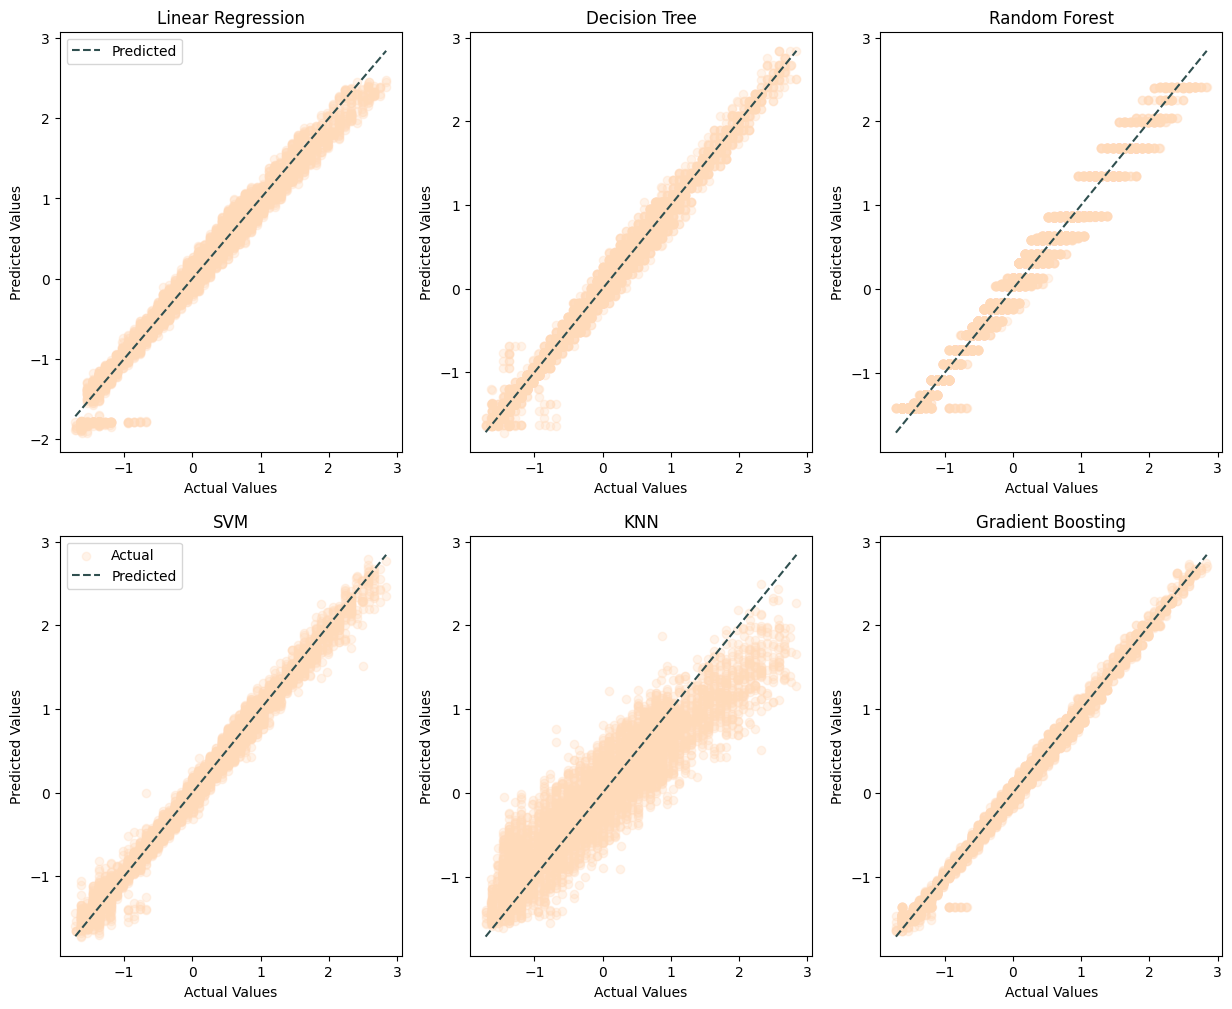

In [170]:
plt.figure(figsize=(15, 12))


# linear regression

ax1 = plt.subplot2grid((2, 3), (0, 0))
plt.scatter(Y_test, LR_predicted, color='#ffdab9', alpha=0.3)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='#2f4f4f', label='Predicted')
plt.title('Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

#decision tree

ax1 = plt.subplot2grid((2, 3), (0, 1))
plt.scatter(Y_test, DT_predicted, color='#ffdab9', alpha=0.3)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='#2f4f4f')
plt.title('Decision Tree')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# random forest

ax1 = plt.subplot2grid((2, 3), (0, 2))
plt.scatter(Y_test, RF_predicted, color='#ffdab9', alpha=0.3)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='#2f4f4f')
plt.title('Random Forest')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# svm

ax1 = plt.subplot2grid((2, 3), (1, 0))
plt.scatter(Y_test, SV_predicted, color='#ffdab9', alpha=0.3, label='Actual')  # alpha controls point transparency for better visualization
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='#2f4f4f', label='Predicted')
plt.title('SVM')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# knn

ax1 = plt.subplot2grid((2, 3), (1, 1))
plt.scatter(Y_test, KNN_predicted, color='#ffdab9', alpha=0.3)  # alpha controls point transparency for better visualization
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='#2f4f4f')
plt.title('KNN')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# gb

ax1 = plt.subplot2grid((2, 3), (1, 2))
plt.scatter(Y_test, GB_predicted, color='#ffdab9', alpha=0.3)  # alpha controls point transparency for better visualization
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--',color='#2f4f4f')
plt.title('Gradient Boosting')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.show()

<h1 style= "font-family :Verdana; color :#004687 ; font-size: 15px"> Metrics Table Evaluation</h1>

In [172]:
Metrics = pd.DataFrame({'Model':('Linear Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Gradient Boosting'),
                       'R2 Score': (lr_r2, dt_r2, rf_r2, sv_r2, knn_r2, gb_r2),
                       'Mean Squared Error': (lr_mse, dt_mse, rf_mse, sv_mse, knn_mse, gb_mse),
                       'Root Mean Squared Error': (lr_rmse, dt_rmse, rf_rmse, sv_rmse, knn_rmse, gb_rmse),
                       'Mean Absolute Error': (lr_mae, dt_mae, rf_mae, sv_mae, knn_mae, gb_mae),
                      })
Metrics

,Model,R2 Score,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error
0,Linear Regression,0.977,0.023,0.151,0.111
1,Decision Tree,0.987,0.013,0.114,0.076
2,Random Forest,0.980,0.013,0.141,0.108
3,SVM,0.987,0.013,0.114,0.085
4,KNN,0.838,0.162,0.402,0.315
5,Gradient Boosting,0.994,0.006,0.079,0.059
